In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import ipywidgets as w
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
plt.rcParams.update({'font.size': 16})
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.stats import skew
plt.rcParams.update({'font.size': 16})

In [2]:
nn_depth  = 4
nn_width  = 256
batchSize =  256
option3 = False
option4 = True
channels = ["C32", "C33", "C34", "C35", "C36"]

In [3]:
from typhon.retrieval.qrnn import set_backend, QRNN
set_backend("pytorch")

#quantiles = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.5, 0.55, 0.65, 0.75, 0.85, 0.95])

quantiles = np.array([ 0.03, 0.16, 0.5, 0.84, 0.97])
quantiles = np.array([0.002, 0.03, 0.16, 0.5, 0.84, 0.97, 0.998])
inChannels = ['C34', 'C41', 'C42', 'C43']

In [4]:
from aws_test_data import awsTestData

if option3:
    inChannels = ['C34', 'C41', 'C42', 'C43']
    test_data = awsTestData("/home/inderpreet/Dendrite/Projects/AWS-325GHz/TB_AWS/testing_data_noise_three_a.nc",
                   inChannels, option = 3)
if option4:
    inChannels = ['C34', 'C41', 'C42', 'C43', 'C44']
    test_data = awsTestData("/home/inderpreet/Dendrite/Projects/AWS-325GHz/TB_AWS/testing_data_noise_four.nc", 
                   inChannels, option = 4)     

In [5]:
def quantile_loss(y_pre, y, quantiles):
    loss = 0
    for i in range(len(quantiles)):
        dy = y_pre[:, 2] - y
        qs = quantiles[i]
        l = np.where(dy >= 0.0, 
                        (1.0 - qs) * abs(dy),
                        (qs) * abs(dy))
        loss += l.mean()
    return loss.mean()  

In [6]:
nn_width_all = [ 8, 16, 32, 64,128, 256, 512]
scores = np.empty([3, len(nn_width_all)])
loss = np.empty([3, len(nn_width_all)])
quantiles1 = np.array([0.5])
for i, nn_depth in enumerate([ 2, 3, 4]):
    for j, nn_width in enumerate(nn_width_all):
        filename = "option4_qrnn_models_3sigma//qrnn_%s_%s_%s.nc" % (str(nn_depth), str(nn_width), str(inChannels[0]))
        print(filename)
        qrnn = QRNN.load(filename)
        
        x = (test_data.x - test_data.mean)/test_data.std
        y_pre = qrnn.predict(x.data)
        y0 = test_data.y0
#        scores = qrnn.crps(y_pre, y, quantiles)
        scores[i,j] = np.mean(qrnn.crps(y_pre, y0, quantiles))
    
        loss[i,j] = quantile_loss(y_pre, y0, quantiles)

option4_qrnn_models_3sigma//qrnn_2_8_C34.nc
option4_qrnn_models_3sigma//qrnn_2_16_C34.nc
option4_qrnn_models_3sigma//qrnn_2_32_C34.nc
option4_qrnn_models_3sigma//qrnn_2_64_C34.nc
option4_qrnn_models_3sigma//qrnn_2_128_C34.nc
option4_qrnn_models_3sigma//qrnn_2_256_C34.nc
option4_qrnn_models_3sigma//qrnn_2_512_C34.nc
option4_qrnn_models_3sigma//qrnn_3_8_C34.nc
option4_qrnn_models_3sigma//qrnn_3_16_C34.nc
option4_qrnn_models_3sigma//qrnn_3_32_C34.nc
option4_qrnn_models_3sigma//qrnn_3_64_C34.nc
option4_qrnn_models_3sigma//qrnn_3_128_C34.nc
option4_qrnn_models_3sigma//qrnn_3_256_C34.nc
option4_qrnn_models_3sigma//qrnn_3_512_C34.nc
option4_qrnn_models_3sigma//qrnn_4_8_C34.nc
option4_qrnn_models_3sigma//qrnn_4_16_C34.nc
option4_qrnn_models_3sigma//qrnn_4_32_C34.nc
option4_qrnn_models_3sigma//qrnn_4_64_C34.nc
option4_qrnn_models_3sigma//qrnn_4_128_C34.nc
option4_qrnn_models_3sigma//qrnn_4_256_C34.nc
option4_qrnn_models_3sigma//qrnn_4_512_C34.nc


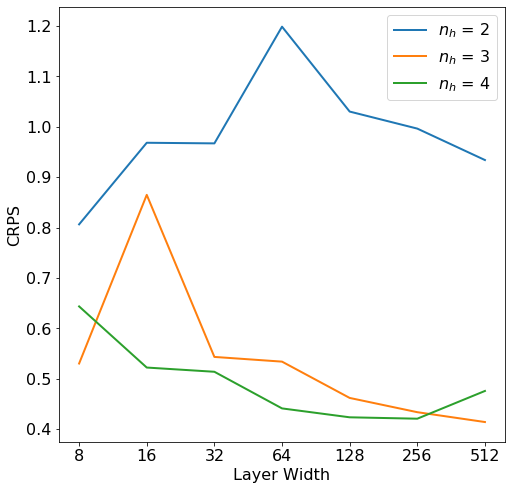

In [7]:
fig, ax = plt.subplots(1,1, figsize = [8,8])
for i in range(3):
    ax.plot(scores[i, :], linewidth = 2)
ax.set_xlabel("Layer Width")
ax.set_ylabel("CRPS")
ax.set_xticks(np.arange(len(nn_width_all)))
ax.set_xticklabels(nn_width_all)
#ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.grid(which = 'both', alpha = 0.4)
ax.legend(["$n_h$ = 2", "$n_h$ = 3", "$n_h$ = 4"])
fig.savefig("Figures/CRPS.png")
  

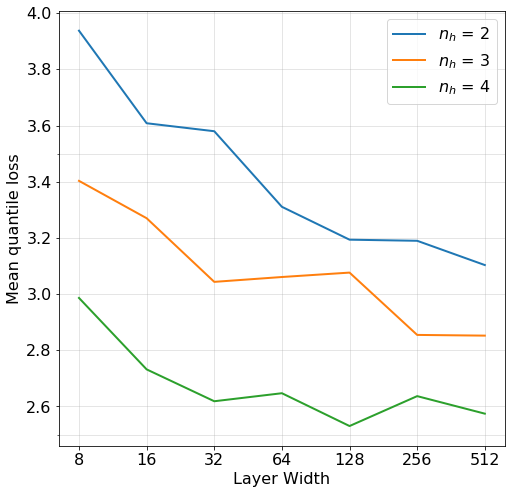

In [8]:
fig, ax = plt.subplots(1,1, figsize = [8,8])
for i in range(3):
    ax.plot(loss[i, :], linewidth = 2)
ax.set_xlabel("Layer Width")
ax.set_ylabel("Mean quantile loss")
ax.set_xticks(np.arange(len(nn_width_all)))
ax.set_xticklabels(nn_width_all)

ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.grid(which = 'both', alpha = 0.4)
#ax.set_yscale('log')
ax.legend(["$n_h$ = 2", "$n_h$ = 3", "$n_h$ = 4"])
fig.savefig("Figures/quantile_loss.png")

option4_qrnn_models_3sigma/qrnn_4_128_C34.nc
[268.4118  267.84253 267.64886 ... 261.93747 261.5069  260.54315]


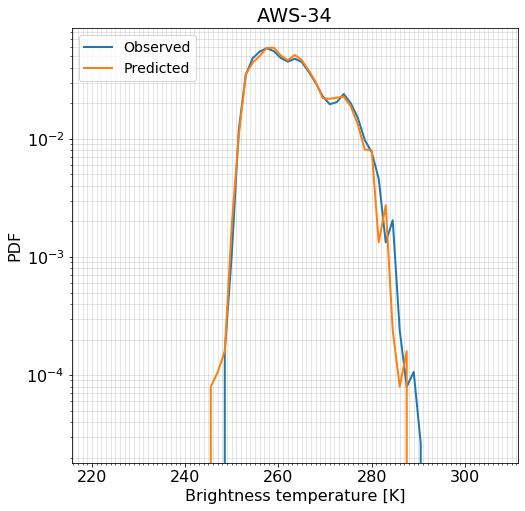

In [82]:
nn_depth = 4
nn_width = 128

channels = ["C32", "C33", "C34", "C35", "C36"]

for channel in (channels[2:3]):
    filename = "option4_qrnn_models_3sigma/qrnn_%s_%s_%s.nc" % (str(nn_depth), str(nn_width), str(channel))
    print (filename)
    qrnn = QRNN.load(filename)
    
    inChannels = [channel, 'C41', 'C42', 'C43', 'C44']
    test_data = awsTestData("/home/inderpreet/Dendrite/Projects/AWS-325GHz/TB_AWS/testing_data_noise_four.nc", 
                   inChannels, option = 4)

    x = (test_data.x - test_data.mean)/test_data.std
    y_pre = qrnn.predict(x.data)
    y0 = test_data.y0
    y_prior = test_data.x[:, 0]
    
    y_pos_mean = qrnn.posterior_mean(x.data)

    print (y_prior)
    bins = np.arange(220, 310, 1.5)
    
    hist = np.histogram(y_pos_mean, bins, density = True)
    histpr = np.histogram(y_prior, bins, density= True)
    hist0 = np.histogram(y0, bins, density = True)
    
    fig, ax = plt.subplots(1, 1,figsize = [8,8])
    ax.plot(bins[:-1], hist[0], linewidth = 2.0)
    ax.plot(bins[:-1], hist0[0], linewidth = 2.0)
#    ax.plot(bins[:-1], histpr[0])
    ax.set_yscale('log')
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.grid(which = 'both', alpha = 0.4)
    ax.set_ylabel("PDF")

    ax.set_xlabel('Brightness temperature [K]')
    ax.legend(["Observed", "Predicted"], loc = 'upper left', prop={'size': 14})
    ax.set_title("AWS-%s"%str(channel[1:]))
    fig.savefig('Figures/distribution_predicted_%s.png'%(channel), bbox_inches='tight')

## Uncertainty Estimation
#### The quantiles given by QRNN describe the uncertainty of each prediction. Uncertainty will vary from case to case, some (cases are cloudy and some are clear)

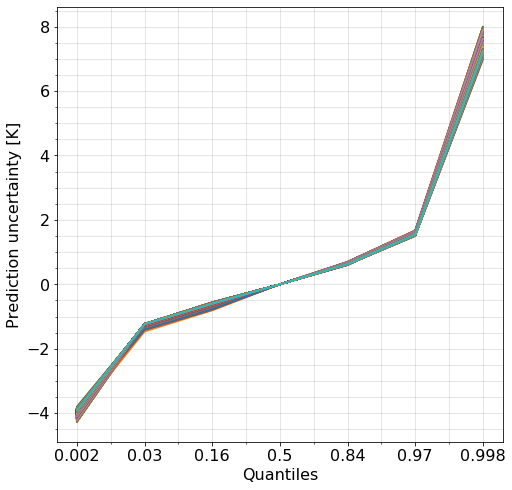

In [76]:
fig, ax = plt.subplots(1, 1, figsize = [8, 8])
x = np.arange(-3, 4, 1)
ii = 0
for i in range(0, 24000, 10):
    ii +=1
#for i in ind:
    y1 = y_pre[i,  :] - y_pre[i, 3]
    
    ax.plot(x, y1)

ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.grid(which = 'both', alpha = 0.4)

ax.set_xlabel("Quantiles")
ax.set_ylabel("Prediction uncertainty [K]")
ax.set_xticks(x)
ax.set_xticklabels(quantiles)

y_pre[100,  :] - y_pre[100, 3]

fig.savefig('Figures/prediction_uncertainty.png')



In [11]:
ii

2400

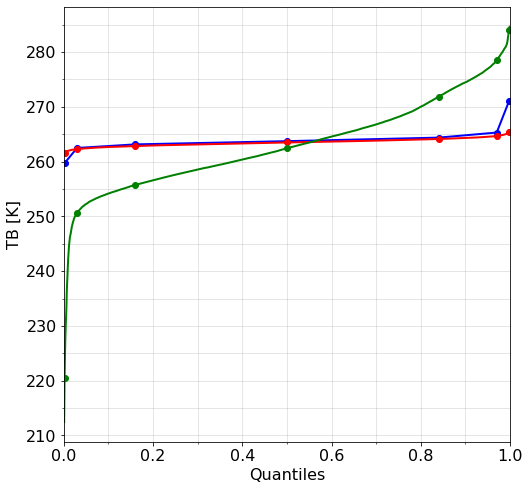

In [79]:
fig, ax = plt.subplots(1, 1, figsize = [8,8])
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.grid(which = 'both', alpha = 0.4)

d = []
j = 12000
for i in range(len(quantiles)):
    d.append(y_pre[:, i])
q_pre = np.array(d)  
q_pre = np.mean(q_pre, axis = 1)
ax.plot(quantiles, q_pre, '-bo', linewidth = 2)

y_normal = np.random.normal(263.5, 0.64, 20000)
quantiles1 = np.arange(0.001, 1, 0.001)
q_normal = np.quantile(y_normal, quantiles1 , axis = 0)
ax.plot(quantiles1, q_normal, 'r', linewidth = 2)

q_normal = np.quantile(y_normal, quantiles , axis = 0)
ax.plot(quantiles, q_normal, 'ro', linewidth = 2)

q_prior = np.quantile(y_prior, quantiles1, axis = 0)
ax.plot(quantiles1, q_prior, 'g', linewidth = 2)

q_prior = np.quantile(y_prior, quantiles, axis = 0)
ax.plot(quantiles, q_prior, 'go')
ax.set_xlim(xmin=0)
ax.set_xlim(xmax=1)
ax.set_xlabel('Quantiles')
ax.set_ylabel('TB [K]')
fig.savefig('Figures/quantile_function_C34.png')

(7,)